# 0. Seazone Code Challenge - Data Science

**A análise desse notebook é baseada em dois datasets relacionados ao Airbnb:**
- desafio_priceav.csv: Contém dados de ocupação e preço de anúncios;
- desafio_details.csv: Contém características de cada anúncio.


**Serão realizados os seguintes passos:**
1. Importar as bibliotecas que serão utilizadas e configurar o notebook;
2. Importar os dados e mesclá-los;
3. Responder as questões propostas no desafio.
---
**Dicas para realização do desafio:**
1. Recomendamos a utilização de Python e/ou R para a solução
<br><t>a. Em python, recomendamos a biblioteca Pandas
<br><t>b. Caso opte pelo Jupyter, garanta que seu código pode ser executado por
terceiros
2. O faturamento de um anúncio é a soma do preço das datas alugadas.
3. Listing é sinônimo de anúncio
4. Dentre os pontos a serem avaliados no desafio, destacamos:
<br><t>a. A qualidade do ReadMe do Github
<br><t>b. A organização, legibilidade e clareza do código
<br><t>c. O embasamento das respostas

# 1. Import Libs and Helper Functions

- Nessa sessão iremos importar as bibliotecas que serão utilizadas ao longo do desafio e configurar o nosso notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.core.display import HTML

In [2]:
# Função para ajustar o notebook Jupyter
def jupyter_settings():
    %matplotlib inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.rcParams['font.size'] = 24
    display(HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    sns.set()
    
jupyter_settings()

In [3]:
# Função para mudar as configurações de fonte nas plotagens
def plot_config(title, xlabel, ylabel):
    plt.ylabel(ylabel, labelpad = 15, fontsize=14, color='grey', fontweight='heavy')
    plt.xlabel(xlabel, labelpad = 15, fontsize=14, color='grey', fontweight='heavy')
    plt.title(title, fontsize=20, color='grey', fontweight='heavy', pad=20)

# 2. Import and Merge Data

- Agora iremos importar as bases de dados com pandas e mesclá-las.

In [4]:
# Lendo details.csv
details = pd.read_csv('data/desafio_details.csv', index_col=0)
details.head()

,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0


In [5]:
details.shape

(4691, 8)

In [6]:
# Lendo priceav.csv
priceav = pd.read_csv('data/desafio_priceav.csv', index_col=0)
priceav = priceav.copy().iloc[:,1:]
priceav.head()

,airbnb_listing_id,booked_on,date,price_string,occupied
0,40201349,blank,2020-11-15,250.0,0
1,40201349,blank,2020-11-26,250.0,0
2,40201349,blank,2020-11-27,250.0,0
3,40201349,blank,2020-12-10,250.0,0
4,40201349,blank,2021-02-01,250.0,0


In [7]:
priceav.shape

(354520, 5)

In [8]:
# Mesclando os datasets details e priceav
full_data = pd.merge(details, priceav, on='airbnb_listing_id')
full_data.head()

,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,booked_on,date,price_string,occupied
0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,2020-12-04 00:00:00,2020-12-04,270.0,1
1,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,2020-12-04 00:00:00,2020-12-05,270.0,1
2,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,2020-12-04 00:00:00,2020-12-06,270.0,1
3,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,2020-12-04 00:00:00,2020-12-07,270.0,1
4,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,2020-12-04 00:00:00,2020-12-08,270.0,1


In [9]:
full_data.shape

(354520, 12)

# 3. Answering the questions

- Nessa sessão iremos responder os questionamentos do desafio.

**Com base nas informações:**
1. Ordene os bairros em ordem crescente de número de listings
2. Ordene os bairros em ordem crescente de faturamento médio dos listings
3. Existem correlações entre as características de um anúncio e seu faturamento?
<br><t>a. Quais? Explique
4. Qual a antecedência média das reservas?
<br><t>a. Esse número é maior ou menor para finais de semana?
<br>Onde possível, embase sua análise com gráficos.

## Q1. Ordenando os bairros em ordem crescente de número de listings

- Aqui nós iremos usar apenas o dataframe details, já que o mesmo é a nossa tabela dimensão, retorna a quantidade total de anúncios (onde o id do anúncio é a chave primária) e possui uma coluna com os bairros, a qual podemos utilizar para fazer essa estratificação.

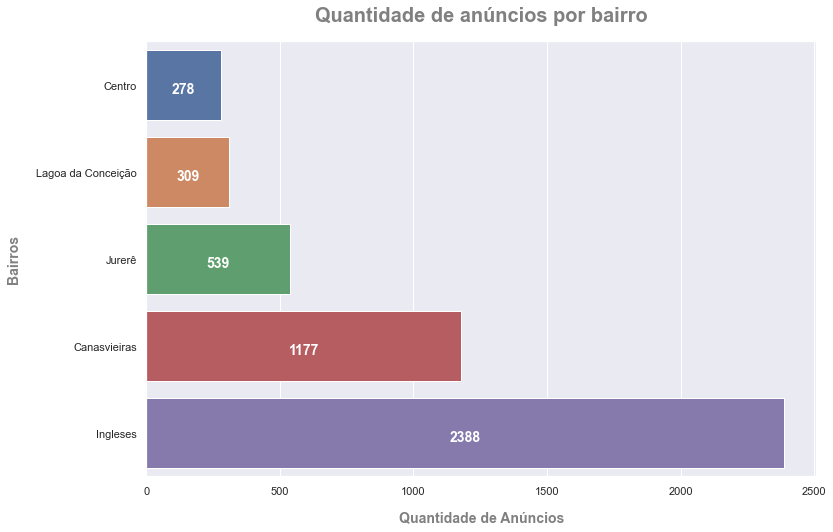

In [10]:
# Plotando gráfico
plot = sns.countplot(data=details, y='suburb', order=details['suburb'].value_counts().sort_values(ascending=True).index)
plot_config(title='Quantidade de anúncios por bairro', xlabel='Quantidade de Anúncios', ylabel='Bairros')

# Plotando rótulos
for p in plot.patches:
    width = p.get_width()
    y = p.get_y()
    plot.text(x=0+(width/2), y=y+0.5, s='{:.0f}'.format(width),
              ha="center", color='white', fontweight='heavy', fontsize=14);

## Q2. Ordene os bairros em ordem crescente de faturamento médio dos listings

- Aqui serão utilizadas os dois dataframes mesclados pela coluna 'airbnb_listing_id' e filtrado pela coluna 'occupied' == 1, ou seja, estaremos calculando o faturamento total de cada anúncio quando locado e posteriormente retirando o faturamento médio dos anúncios por bairro.

In [11]:
# Filtrando apenas os dados onde as locações estavam ocupadas
full_data_occupied = full_data[full_data['occupied'] == 1].copy()

# Calculando o total de faturamento por anúncio 
total_revenues_per_listing = full_data_occupied.groupby('airbnb_listing_id')[['price_string']].sum().reset_index()
total_revenues_per_listing.rename(columns={'price_string':'total_revenue'}, inplace=True)

# Mesclando o total de faturamento aos detalhes de cada anúncio
details_revenue = pd.merge(details, total_revenues_per_listing, on='airbnb_listing_id')

details_revenue.head()

,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,total_revenue
0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,6400.0
1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0,8640.0
2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0,8078.0
3,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0,15195.0
4,31301214,Ingleses,Apartamento beira mar com piscina nos Ingleses,2.0,2.0,5.0,True,62.0,6460.0


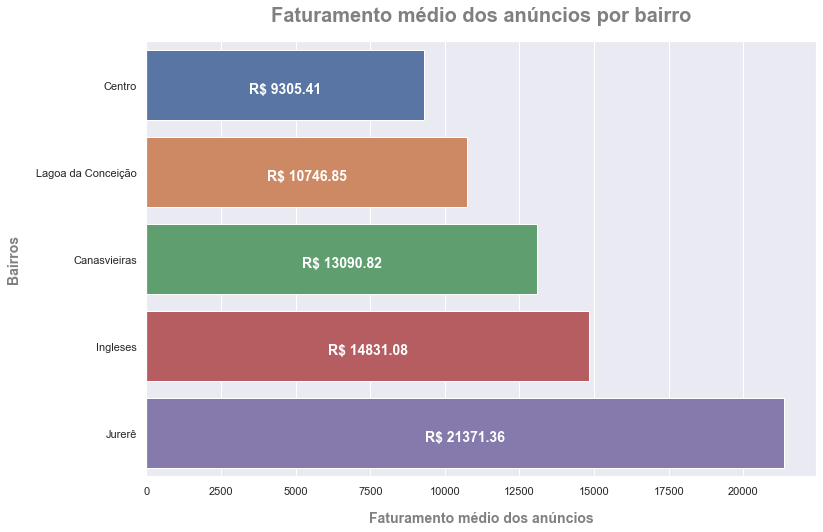

In [12]:
# Criando tabela com a média de faturamento dos anúncios por cada bairro
ordered_by_avg_revenue = details_revenue.groupby('suburb').mean().sort_values('total_revenue', ascending=True)['total_revenue']

# Plotando gráfico
plot = sns.barplot(y=ordered_by_avg_revenue.index, x=ordered_by_avg_revenue.values)
plot_config(title='Faturamento médio dos anúncios por bairro', xlabel='Faturamento médio dos anúncios', ylabel='Bairros')

# Plotando rótulos
for p in plot.patches:
    width = p.get_width()
    y = p.get_y()
    plot.text(x=0+(width/2), y=y+0.5, s='R$ {:.2f}'.format(width),
              ha="center", color='white', fontweight='heavy', fontsize=14);

## Q3. Existem correlações entre as características de um anúncio e seu faturamento?
a. Quais? Explique.

---
- Aqui nós estaremos medindo a correlação entre as características dos anúncios e o faturamento total dos mesmos.

In [13]:
# Listando as correlações dos detalhes de cada anúncio implicados no faturamento total dos mesmos
details_revenue.corr()[['total_revenue']]

,total_revenue
airbnb_listing_id,0.032894
number_of_bedrooms,0.195489
number_of_bathrooms,0.207884
star_rating,0.068390
is_superhost,0.087364
number_of_reviews,0.113743
total_revenue,1.000000


**Resposta**<br>
Apesar de baixas correlações, sim. Principalmente o **número de quartos** e o **número de banheiros**, pois são os que possuem correlações mais impactantes (próximo de 1 ou de -1) e em ambos são correlações diretamente proporcionais, ou seja, quanto maior o número de quartos ou maior o número de banheiros, maior tende a ser o seu faturamento. No caso das outras características há correlações pouco impactantes.

## Q4. Qual a antecedência média das reservas?
a. Esse número é maior ou menor para finais de semana?

---
- Por fim iremos criar uma coluna constando a diferença entre a data de ocupação e a data de locação, para assim sabermos a antecedência no qual cada local foi reservado, calcularmos a média dessas antecedências e identificarmos se para locações nos fins de semana essa média é maior ou menor que a dos dias úteis.

In [14]:
# Transformando strings em datas
full_data_occupied['date'] = full_data_occupied['date'].apply(lambda x: datetime.strptime(x.split('-')[2] + '/' + x.split('-')[1] + '/' + x.split('-')[0], '%d/%m/%Y'))
full_data_occupied['booked_on'] = full_data_occupied['booked_on'].apply(lambda x: datetime.strptime(x.split(' ')[0].split('-')[2] + '/' + x.split(' ')[0].split('-')[1] + '/' + x.split(' ')[0].split('-')[0], '%d/%m/%Y'))

# Substituindo os outliers de 'booked_on' pela média, o limiar escolhido foi o de 13/08/2008, data da fundação do Airbnb, pois existiam datas menores que essa
full_data_occupied.loc[full_data_occupied['booked_on'] < '13/08/2008', 'booked_on'] = full_data_occupied['booked_on'].mean()

# Criando coluna com a diferença, em dias, entre a data de ocupação e a data da reserva
full_data_occupied['difference'] = (full_data_occupied['date'] - full_data_occupied['booked_on']).dt.days

In [15]:
# Calculando a antecedência média das reservas
print("Antecedência média das reservas na semana inteira = {:.2f} dias".format(full_data_occupied['difference'].mean()))

Antecedência média das reservas na semana inteira = 37.68 dias


**Resposta**<br>
A antecedência média com qual as reservas são feitas é de aproximadamente 37 dias e 16 horas.

In [16]:
# Criando coluna com os nomes dos dias da semana
full_data_occupied['weekday'] = full_data_occupied['date'].dt.day_name()

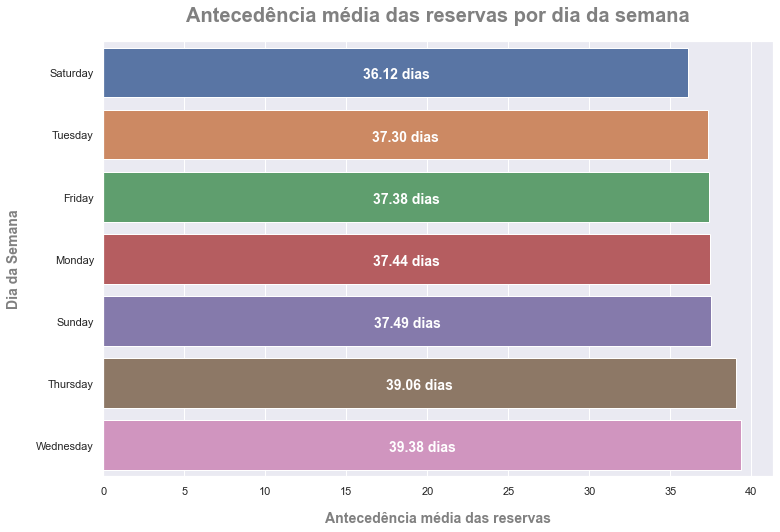

In [17]:
# Criando tabela com antecedência média das reservas por cada dia da semana
mean_advance_by_weekday = full_data_occupied.groupby('weekday')['difference'].mean().sort_values()

# Plotando gráfico
plot = sns.barplot(y=mean_advance_by_weekday.index, x=mean_advance_by_weekday.values)
plot_config(title='Antecedência média das reservas por dia da semana', xlabel='Antecedência média das reservas', ylabel='Dia da Semana')

# Plotando rótulos
for p in plot.patches:
    width = p.get_width()
    y = p.get_y()
    plot.text(x=0+(width/2), y=y+0.5, s='{:.2f} dias'.format(width),
              ha="center", color='white', fontweight='heavy', fontsize=14);

**Resposta**<br>
Os dias com maior antecedência média das reservas são **quarta-feira**, **quinta-feira** e **domingo**.

<h3>Para ficar melhor entendido, podemos criar uma coluna que nos diga se a data é um fim de semana ou um dia comum e calcular a média para ambas.</h3>

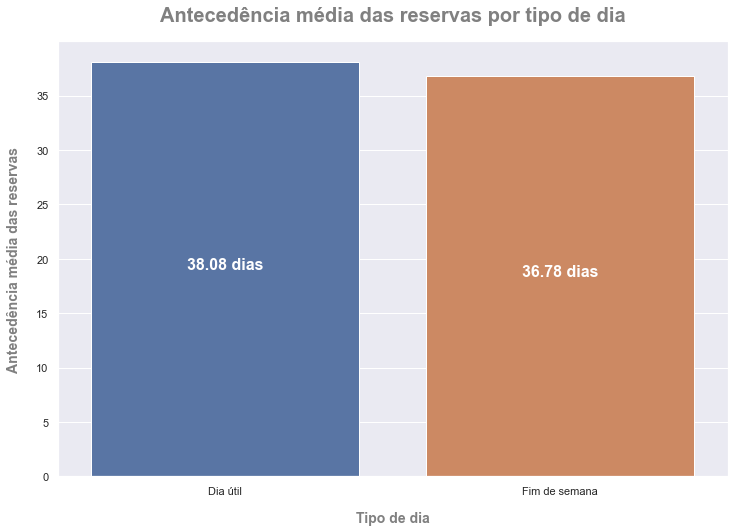

In [18]:
# Criando coluna de estratificação para fim de semana e dia útil
full_data_occupied['day_type'] = full_data_occupied['weekday'].apply(lambda x: 'Fim de semana' if ((x == 'Saturday') | (x == 'Sunday')) else 'Dia útil')

# Criando tabela com antecedência média das reservas por cada dia da semana
mean_advance_by_daytype= full_data_occupied.groupby('day_type')['difference'].mean()

# Plotando gráfico
plot = sns.barplot(x=mean_advance_by_daytype.index, y=mean_advance_by_daytype.values)
plot_config(title='Antecedência média das reservas por tipo de dia', xlabel='Tipo de dia', ylabel='Antecedência média das reservas')

# Plotando rótulos
for p in plot.patches:
        height = p.get_height()
        plot.text(x=p.get_x()+p.get_width()/2., y=height-height/2, s='{:.2f} dias'.format(height),
                  ha="center", color='white', fontweight='heavy', fontsize=16);

In [19]:
# Separando os dados em dias úteis e finais de semana
mean_advance_weekends = full_data_occupied[full_data_occupied['day_type'] == 'Fim de semana']['difference'].mean()
mean_advance_weekdays = full_data_occupied[full_data_occupied['day_type'] == 'Dia útil']['difference'].mean()

# Diferença entre dias úteis e finais de semana quanto à antecedência média das reservas
print('A antecedência média das reservas é maior nos finais de semana com uma diferença de {:.2f} dias.'.format(mean_advance_weekdays - mean_advance_weekends))

A antecedência média das reservas é maior nos finais de semana com uma diferença de 1.30 dias.


**Resposta**<br>
A antecedência média das reservas é maior para os **dias úteis**.